Earthquakes, one of the most powerful and unpredictable forces of nature are capable of causing widespread destruction and loss of life. Studying earthquakes provides valuable insights into their geographical reach and magnitudes within specific regions. It can also help identify vulnerable areas, assess infrastructure resilience, and plan effective disaster response strategies. Understanding the geographical history of them can also contribute to scientific research, enabling advancements in earthquake prediction, preparedness, and community safety measures. For this assignment, I choose to chart global earthquakes over the years to discern patterns and understand the magnitude of their impact across different geographical areas. This can help monitor the trends of earthquakes and the susceptibility of the region based on previous data. I choose to map on a global scale to demonstrate the zones affected by the earthquakes and the magnitude of them for affected areas. Mapping them can help understand their distribution, predict potentially hazardous area, and mitigate risks. On a research level, understanding the geography of earthquakes can help analyse the seismic structure of the area. 

In this assignment, I aim for the maps to show the regions impacted by earthquakes over the years 1970-2010 to demonstrate the areas/countries susceptible for future earthquakes. The interactive map will depict the earthquakes over the recent years with the magnitude and date of impact. This shows the recent history of the earthquakes and analyse the impact of them globally.   


In [52]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import contextily as ctx
import folium
import json
import geojson
import shapefile
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import requests

In [53]:
#Import the static historical data from file
new_data = pd.read_csv("data_static.csv", low_memory = False)

To understand the enormous impact and history of the earthquakes globally, all the earthquakes over the time period 1970-2010 is analysed with the dataset "data_static.csv". This contains the historical data of the earthquakes over the specified time period with the magnitude of impact to understand the statistical data for the area. The data contains the list of global earthquakes with other data like Date, Magnitude and Depth of impact. This data can help analyse and demonstrate the overall regions previously affected and the intensity of its impact. 


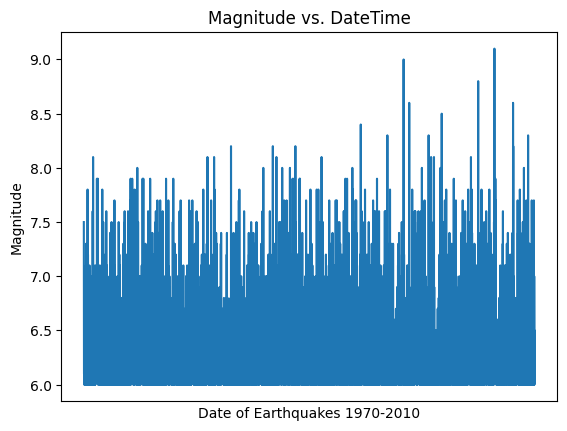

In [54]:
#Graph to show the Earthquakes history
plt.plot(new_data['DateTime'], new_data['Magnitude'],linestyle='solid')
plt.xticks([])
plt.xlabel('Date of Earthquakes 1970-2010')
plt.ylabel('Magnitude')
plt.title('Magnitude vs. DateTime')

plt.show()

The earthquakes data from 1970-2010 is plotted on a graph to show the magnitude of the earthquakes over the years which range from values of 6.5 to 9. This can help us understand the severity and the frequency of the earthquakes with these high magnitudes. The line graph of earthquakes over the years can shed some light on importance of mapping earthquakes and how crucial understanding this can be. This portrays the motivation behind the topic of dataset chosen for the assignment. 


In [55]:
new_crs = 'EPSG:4326'
wgs = 'EPSG:4326'
gdf = gpd.GeoDataFrame(new_data, geometry=gpd.points_from_xy(new_data.Longitude, new_data.Latitude), crs = wgs)
gdf = gdf[~gdf.geometry.is_empty] # remove empty geometries
gdf.to_file("data_static.shp")
gdf = gdf.to_crs(new_crs)

In [56]:
source = ctx.providers.CartoDB.Voyager
ctx.add_basemap(ax, crs= gdf.crs.to_string(), source= source)

def ax_ticks_off(ax):
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.tick_params(axis= 'both', which= 'both', length=0)

<Figure size 640x480 with 0 Axes>

The Earthquakes of the time period 1970-2010 are plotted onto a base static map to illustrate the regions impacted previously to understand the areas historically affected.

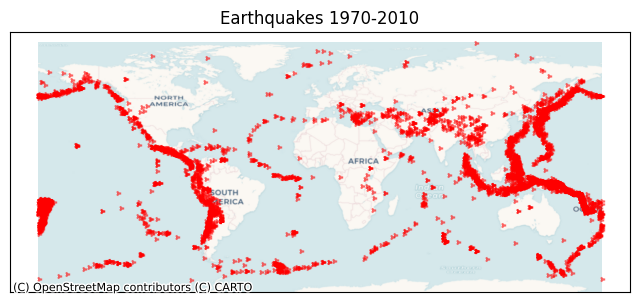

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
gdf.plot(ax=ax, markersize = 15, color = 'red', marker = '4', alpha = 0.6)
ctx.add_basemap(ax, crs= gdf.crs.to_string(), source= source)
ax.set_title("Earthquakes 1970-2010")
ax_ticks_off(ax)

In [58]:
#API Request to get the data based on time period and magnitude
url = "https://everyearthquake.p.rapidapi.com/earthquakesByDate"

querystring1 = {"startDate":"2010-01-27","endDate":"2024-01-27","start":"30","count":"50","type":"earthquake","magnitude":"4"}
querystring2 = {"startDate":"2010-01-27","endDate":"2024-01-27","start":"50","count":"50","type":"earthquake","magnitude":"6"}
querystring3 = {"startDate":"2010-01-27","endDate":"2024-01-27","start":"1","count":"50","type":"earthquake","magnitude":"8"}

headers = {
	"X-RapidAPI-Key": "71f0747dc6mshccb1a6486e0316ap18d1b6jsn32ad5f9673ff",
	"X-RapidAPI-Host": "everyearthquake.p.rapidapi.com"
}

response1 = requests.get(url, headers=headers, params=querystring1)
response2 = requests.get(url, headers=headers, params=querystring2)
response3 = requests.get(url, headers=headers, params=querystring3)

data1= response1.json()

data2= response2.json()

data3= response3.json()

The data extracted from API source includes the set of earthquakes with specific ranges of magnitudes for the time period 2010-2024. The data extracted contains the location, date and magnitude among other attributes. This data can help us understand the magnitude and region of earthquakes over recent years and compare against the previous historical data to analyse the region of impact. The data obtained from the API is categorized and plotted based on its magnitude on Richter scale for Magnitude of Earthquakes. The areas plotted with this data contains specific location’s details of impact. 

The API data from ‘https://everyearthquake.p.rapidapi.com’ provides a comprehensive database of the earthquakes globally for a specified time range and magnitude. The data queries are divided based on magnitude to explore earthquakes within specific magnitude ranges of Richter scale: moderate impact (4 to 6), major impact (6 to 8), and great impact (8 and above). The API is retrieved using the Get Request method in Python. This uses the ‘requests’ library in python to fetch the data from the API using the API call passing the parameters (URL, headers and params) from RapidAPI after authentication. Once the request returns the response with status code 200(Successful), the API returns JSON-formatted responses containing the earthquakes information based on the specified criteria, containing details like their location, magnitude, depth, and timestamp.

In [59]:
#Extract the properties data from the requests
new_data1=data1['data']
df1 = pd.DataFrame(new_data1)

new_data2=data2['data']
df2 = pd.DataFrame(new_data2)

new_data3=data3['data']
df3 = pd.DataFrame(new_data3)

The data retrieved from the API forms the backbone of the interactive map, imparting information on the earthquakes for the ranges of magnitude and details like location and date. By analysing and filtering the data retrieved, the points on the map are plotted to illustrate the earthquakes of the categories Moderate, Major and Great over the recent years. 

In [60]:
mymap = folium.Map(location=[4,-72], tiles="Cartodb Positron", zoom_start=3)

Mag4 = folium.FeatureGroup(name='Moderate Impact')
Mag6 = folium.FeatureGroup(name='Major Impact')
Mag8 = folium.FeatureGroup(name='Great Impact')

The interactive Map plotted presents the major Earthquakes since 2010 categorised on the basis of Magnitude of its impact. I selected the base map for its minimalistic design and simplicity to allow the main data depicted to be highlighted. This map design allows the vibrant Marker points to stand out and hence maintain focus on the dataset of earthquakes. Choosing the monochromatic map can enhance the locations plotted on the map. Filtering the data can help clear the map from having excessive data points that can clutter the Map and hence make it ineffective in analysing and understanding the data. 

The points on the Map are layered based on the magnitude ranges:Orange Markers for  ModerateImpact  (4 to 6) illustrates earthquakes that had impact on infrastructure and minimal damage to livesRed Markers for, MajorImpact (6 to 8) indicates massive property damage and loss of life an Blue Markers for  GreatImpact (8 and above) shows earthquakes that caused near total destruction and devastating casualty. Layering based on the magnitude can help us better analyse and view the areas impacted by the earthquakes.


In [61]:
#Adding the Map markers based on the colour of the categories 
for loc in new_data1:
    location_name = f"{loc['location']},{loc['date']}, {loc['magnitude']}"
    folium.Marker(location=[loc['latitude'],loc['longitude']],radius=100, popup=location_name ,icon=folium.Icon(color="orange",icon="circle", prefix='fa')).add_to(Mag4)

for loc in new_data2:
    location_name = f"{loc['location']},{loc['date']}, {loc['magnitude']}"
    folium.Marker(location=[loc['latitude'],loc['longitude']],radius=100, popup=location_name,icon=folium.Icon(color="darkred", icon="circle", prefix='fa')).add_to(Mag6)

for loc in new_data3:
    location_name = f"{loc['location']},{loc['date']}, {loc['magnitude']}"
    folium.Marker(location=[loc['latitude'],loc['longitude']],radius=100, popup=location_name,weight='100',icon=folium.Icon(color="darkblue", icon="circle", prefix='fa')).add_to(Mag8)


The Markers mapped contain crucial information to understand the earthquake plotted: Location, Date and magnitude. The interactivity of the map enhances the readability and analysing quality of the map. The map is chosen to a region affected by all categories of earthquakes to illustrate one of the areas affected by earthquakes of all categories. 

In [62]:
Mag4.add_to(mymap)
Mag6.add_to(mymap)
Mag8.add_to(mymap)

folium.LayerControl().add_to(mymap)
mymap

This interactive map illustrates one of the most devastating natural disasters, Earthquakes over the recent years from 2010 and categorised based on the Magnitude for understanding the severity easily. 